In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('./train.csv')
df.head()

,Unnamed: 0,loan_amnt,term,int_rate,grade,home_ownership,emp_length,label,Cash,DirectPay
0,0,18500.0,36,13.58,5,1,6,0,1,0
1,1,7000.0,36,7.34,7,1,10,0,1,0
2,2,16000.0,60,11.98,6,1,5,0,1,0
3,3,28000.0,36,10.90,6,1,6,0,1,0
4,4,8300.0,36,7.34,7,1,4,0,1,0


In [3]:
df.drop(["Cash","DirectPay","Unnamed: 0"],axis=1,inplace=True)
df.head()

,loan_amnt,term,int_rate,grade,home_ownership,emp_length,label
0,18500.0,36,13.58,5,1,6,0
1,7000.0,36,7.34,7,1,10,0
2,16000.0,60,11.98,6,1,5,0
3,28000.0,36,10.90,6,1,6,0
4,8300.0,36,7.34,7,1,4,0


In [4]:
from sklearn.utils import shuffle

In [5]:
train = shuffle(df)

In [6]:
y = train.label
y

313     0
2635    1
1799    0
3954    1
2309    0
       ..
744     0
3959    1
1700    0
1952    0
4911    1
Name: label, Length: 4992, dtype: int64

In [7]:
train.drop("label",axis=1,inplace=True)
train.head()

D:\Develop Tools\anaconda\envs\ml\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,loan_amnt,term,int_rate,grade,home_ownership,emp_length
313,25000.0,36,5.31,7,3,10
2635,35000.0,60,18.45,4,1,3
1799,20000.0,36,16.01,5,3,7
3954,15000.0,36,24.84,3,1,2
2309,40000.0,36,9.43,6,1,7


In [8]:
x = train
x

,loan_amnt,term,int_rate,grade,home_ownership,emp_length
313,25000.0,36,5.31,7,3,10
2635,35000.0,60,18.45,4,1,3
1799,20000.0,36,16.01,5,3,7
3954,15000.0,36,24.84,3,1,2
2309,40000.0,36,9.43,6,1,7
...,...,...,...,...,...,...
744,40000.0,60,9.92,6,3,10
3959,19200.0,36,15.04,5,1,10
1700,11500.0,36,23.87,3,1,10
1952,15000.0,36,16.01,5,1,10


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:
from xgboost import XGBClassifier

In [12]:
model = XGBClassifier()
model.fit(x_train,y_train)

[21:22:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Develop Tools\anaconda\envs\ml\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
len(x_train),len(x_test),len(y_test),len(y_train)

(3993, 999, 999, 3993)

In [14]:
y_pred = model.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
acc = accuracy_score(y_test,y_pred)
print("%.2f%%"%(acc*100))

88.89%


In [17]:
y_pred_train = model.predict(x_train)
print("%.2f%%"%(accuracy_score(y_train,y_pred_train)*100))

94.89%


In [17]:
import joblib

In [18]:
joblib.dump(model,"xgb_plus.joblib")

['xgb_plus.joblib']

In [19]:
xgb = joblib.load("xgb_plus.joblib")

In [20]:
y_pred = xgb.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print("%.2f%%"%(acc*100))

87.79%


In [19]:
from matplotlib import pyplot

In [21]:
from sklearn import metrics as ms

In [22]:
test_accuracy = ms.accuracy_score(y_test, y_pred)#准确率
test_accuracy

0.8888888888888888

In [23]:
test_auc = ms.roc_auc_score(y_test,y_pred)#auc
test_auc

0.8881821097790786

In [26]:
fpr,tpr,threshold = ms.roc_curve(y_test,y_pred) 

SyntaxError: invalid character in identifier (<ipython-input-26-578e50de1b96>, line 1)

In [27]:
fpr,tpr,threshold = ms.roc_curve(y_test,y_pred)
fpr,tpr,threshold

(array([0.        , 0.07465619, 1.        ]),
 array([0.        , 0.85102041, 1.        ]),
 array([2, 1, 0], dtype=int64))

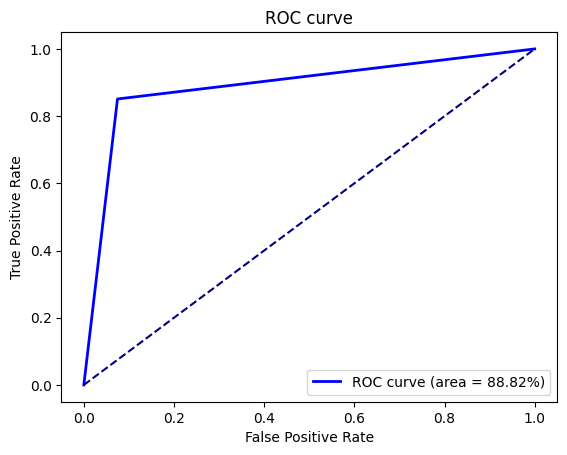

In [31]:
pyplot.plot(fpr, tpr, color='blue',lw=2, label='ROC curve (area = %.2f%%)'% (test_auc * 100.0))###假正率为横坐标，真正率为纵坐标做曲线

pyplot.legend(loc="lower right")

pyplot.plot([0, 1], [0, 1], color='navy', linestyle='--')

pyplot.xlabel('False Positive Rate')

pyplot.ylabel('True Positive Rate')

pyplot.title('ROC curve')

pyplot.show()